<a href="https://colab.research.google.com/github/rizzaesh/Learning-tools/blob/main/data_science_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('hello')

hello


In [76]:
import requests
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [44]:
def get_historic(symbl, exchange = 'bitfinex', after = '2010-09-09'):
    url = f'http://api.cryptowat.ch/markets/{exchange}/{symbl}usd/ohlc'
    resp = requests.get(url,params={'perios':'3600','after':str(int(pd.Timestamp(after).timestamp()))})
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'],columns = ['closetime','openprice','highpr','lowpr','closepr','volume','NA'])
    df['closetime'] = pd.to_datetime(df['closetime'],unit = 's')
    # df.set_index('closetime',inplace = True)
    return df

In [226]:
btc = get_historic('btc','bitstamp')

In [227]:
btc.head()

,closetime,openprice,highpr,lowpr,closepr,volume,NA
0,2021-05-30 21:00:00,36102.48,36342.44,35921.99,36070.06,145.843507,5.272863e+06
1,2021-05-30 22:00:00,36076.54,36229.41,35879.35,35969.50,52.844291,1.903958e+06
2,2021-05-30 23:00:00,35959.83,36048.59,35694.99,35718.37,132.329285,4.750062e+06
3,2021-05-31 00:00:00,35753.54,35839.42,35536.76,35677.72,67.925649,2.421974e+06
4,2021-05-31 01:00:00,35675.30,36008.67,35260.00,35358.83,106.596158,3.782696e+06


In [161]:
Y_ = [f'{i}' for i in range(len(btc['closepr']))]

In [228]:
X, x, Y, y = train_test_split(btc,btc['closepr'])

In [229]:
X = X.drop('closetime',axis = 1)
X = X.drop('closepr',axis = 1)

In [230]:
x = x.drop('closetime',axis = 1)
x = x.drop('closepr',axis = 1)

In [231]:
cls = DecisionTreeRegressor()

In [232]:
cls.fit(X,Y)

DecisionTreeRegressor()

In [233]:
pre =cls.predict(x)

In [234]:
cls.score(x,y)

0.99936512477273

In [141]:
# cls.de

<bound method BaseDecisionTree.decision_path of DecisionTreeRegressor()>

In [86]:
import numpy as np

In [172]:
y_true = np.array(y)
y_pred = np.array(pre)

In [133]:
y_true[1]

35684.82

In [173]:
scores = np.zeros(len(y_pred))

In [174]:
for i in range(len(y_pred)):
    scores[i] = y_true[i]-y_pred[i]

In [177]:
scores.min()

-699.369999999999

In [138]:
data = pd.DataFrame()

In [139]:
data['pred'] = y_pred
data['true'] = y_true
data['dif'] = scores

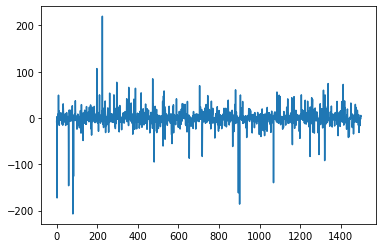

In [140]:
data['dif'].plot()

In [181]:
data = pd.read_csv('/content/drive/MyDrive/A/Data Science 1/master_dataset.csv')
data

,ip.src,ip.dst,ip.len,ip.flags.df,ip.flags.mf,ip.fragment,ip.fragment.count,ip.fragments,ip.ttl,ip.proto,tcp.window_size,tcp.ack,tcp.seq,tcp.len,tcp.stream,tcp.urgent_pointer,tcp.flags,tcp.analysis.ack_rtt,tcp.segments,tcp.reassembled.length,http.request,udp.port,frame.time_relative,frame.time_delta,tcp.time_relative,tcp.time_delta,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000,bruteforce
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,4.724600,4.724600,0.000000,0.000000,bruteforce
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,7.588901,2.864301,0.000000,0.000000,bruteforce
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,9.412412,1.823511,0.000000,0.000000,bruteforce
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,14.162453,4.750041,0.000000,0.000000,bruteforce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16461,167772687,167772674,91,1,0,0,0,0,64,6,64256,67,5,39,1,0,24,0.000000,1,43,0,0,173.878489,0.001952,10.006025,0.001952,sqlattack
16462,167772674,167772687,52,1,0,0,0,0,64,6,5824,44,67,0,1,0,16,0.001952,0,0,0,0,173.880441,0.001952,10.007977,0.001952,sqlattack
16463,167772674,167772687,63,1,0,0,0,0,64,6,5824,44,67,11,1,0,24,0.000000,0,0,0,0,173.880441,0.000000,10.007977,0.000000,sqlattack
16464,167772687,167772674,52,1,0,0,0,0,64,6,64256,78,44,0,1,0,16,0.001953,0,0,0,0,173.882394,0.001953,10.009930,0.001953,sqlattack


In [206]:
data['tcp.stream'].value_counts()

0       2695
1         74
10        66
4         66
6         66
        ... 
703        2
702        2
701        2
700        2
2043       2
Name: tcp.stream, Length: 2044, dtype: int64

In [183]:
ml = DecisionTreeClassifier()

In [184]:
X,x,Y,y = train_test_split(data.drop('label',axis = 1),data['label'])

In [185]:
ml.fit(X,Y)

DecisionTreeClassifier()

In [120]:
yp = ml.predict(x)

In [186]:
ml.score(x,y)

0.9844547000242896

In [178]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [208]:
ml.feature_importances_

array([0.        , 0.        , 0.00133153, 0.05231624, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.1900111 ,
       0.00890484, 0.        , 0.00594352, 0.        , 0.53794656,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00222054, 0.0891264 , 0.02246975, 0.08972952,
       0.        ])

In [205]:
data.columns[14]

'tcp.stream'

In [236]:
cls.feature_names_in_

array(['openprice', 'highpr', 'lowpr', 'volume', 'NA'], dtype=object)

In [235]:
cls.feature_importances_

array([8.19570127e-05, 8.95148055e-01, 1.04697013e-01, 3.87732413e-05,
       3.42021748e-05])

In [223]:
ml.feature_names_in_

array(['ip.src', 'ip.dst', 'ip.len', 'ip.flags.df', 'ip.flags.mf',
       'ip.fragment', 'ip.fragment.count', 'ip.fragments', 'ip.ttl',
       'ip.proto', 'tcp.window_size', 'tcp.ack', 'tcp.seq', 'tcp.len',
       'tcp.stream', 'tcp.urgent_pointer', 'tcp.flags',
       'tcp.analysis.ack_rtt', 'tcp.segments', 'tcp.reassembled.length',
       'http.request', 'udp.port', 'frame.time_relative',
       'frame.time_delta', 'tcp.time_relative', 'tcp.time_delta'],
      dtype=object)

In [ ]:
sns.countplot(data['tcp.stream'])